# Numpy and Pandas

## Objectives: 

- Use numpy.random to generate a dataset.
- Read in various forms of data into a panadas dataframe
- Perform some basic operations on the dataframe 

## Agenda

- Review Numpy
- Introduce Pandas
- Reading in data and merging dataframes (DF)
- working with missing values
- Slicing, selecing and xxtracting data

## Numpy

- There is nothing in NumPy which can’t be done via python lists or by using other data structures.
- NumPy provides an efficient storage and better way handling of the data for mathematical operations using simple API’s.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
# Create an array of 25 numbers between -1 and 1
pure = np.linspace(-1, 1, 25)

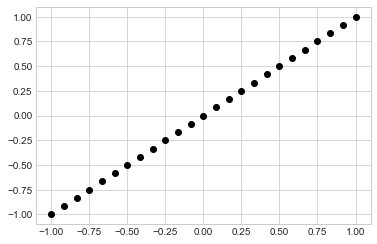

In [3]:
# Create a scatterplot where the x and y both refer to the array created above
plt.plot(pure, pure, 'o', color='black');


In [4]:
pure.shape

(25,)

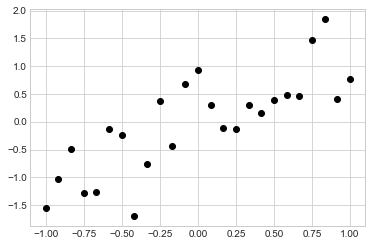

In [5]:
#Add some noise to the data by randomly generating numbers between 0 and .5 to add to the Ys
noise = np.random.normal(0, .5, pure.shape)
signal = pure + noise
plt.plot(pure, signal, 'o', color='black');


In [6]:
# Graph a log transformation of the numbers
pure = np.linspace(0, 10000, 50)
noise = np.random.normal(-.2, .2, pure.shape)
y = np.log(pure)
signal = y + noise

/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


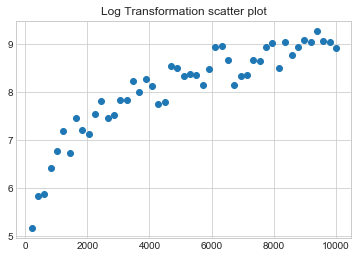

In [7]:
# Create plot
fig, ax = plt.subplots()
ax.scatter(pure, signal)
ax.set_title('Log Transformation scatter plot')

plt.show()

**Use a numpy function to transform the `pure` data series and then create your own scatterplot of the new data with the `pure` data.**


/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


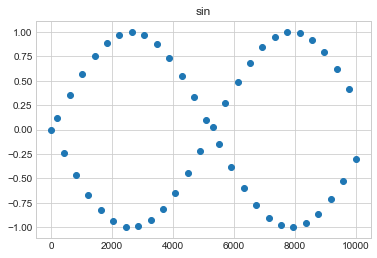

In [13]:
# Create plot
fig, ax = plt.subplots()

#transform your data with a numpy function
pure_sin = np.sin(pure)

noise = np.random.normal(-.2, .2, pure_sin.shape)
y = np.log(pure_sin)
signal = y + noise

#plot the newly retransformed graph
ax.scatter(pure, pure_sin)

# fig, ax = plt.subplots()
# ax.scatter(pure_sin, signal)
# ax.set_title('Log Transformation scatter plot')


#rename your grpah
ax.set_title('sin')

plt.show()


In [9]:
pure_sin = np.sin(pure)

array([ 0.        ,  0.12158823, -0.24137225,  0.3575746 , -0.468471  ,
        0.57241587, -0.66786681,  0.75340745, -0.82776846,  0.88984643,
       -0.93872019,  0.97366453, -0.9941609 ,  0.99990517, -0.99081211,
        0.96701664, -0.92887185,  0.87694377, -0.81200295,  0.73501302,
       -0.64711642,  0.54961742, -0.44396279,  0.33172031, -0.21455552,
        0.09420699,  0.02753945, -0.14887724,  0.26800588, -0.38315765,
        0.49262384, -0.59478011,  0.68811059, -0.77123037,  0.84290606,
       -0.90207408,  0.94785645, -0.97957383,  0.99675556, -0.99914668,
        0.98671172, -0.9596352 ,  0.9183189 , -0.86337589,  0.79562148,
       -0.71606103,  0.62587514, -0.52640205,  0.41911781, -0.30561439])

## Pandas 

In [15]:
import pandas as pd

### Core components of pandas: Series and DataFrames

The primary two components of pandas are the `Series` and `DataFrame`.

A Series is essentially a column, and a DataFrame is a multi-dimensional table made up of a collection of Series.

<img src="series-and-dataframe.png" alt="drawing" width="600"/>


In [16]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray (structured or homogeneous), dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, argument order is maintained for Python 3.6
 |         and later.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIndex if
 |      no indexing information part of input data and no index provided
 |  columns : Index or array-like
 |      Column labels to use for resulting frame. Will default to
 |      Ran

## Creating a Dataframe

A dataframe can be created from many different types of data sources.  Below are diffeten examples of this.  

### Create from dictionaries

In [17]:
#define a ditionary containing employee data
data1 = {'Name':['Jai', 'Princi', 'Gaurav', 'Anuj'], 
        'Age':[27, 24, 22, 32], 
        'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Msc', 'MA', 'MCA', 'Phd'],
        'Mobile No': [97, 91, 58, 76]} 

In [24]:
#Convert the dictionary into DataFrame 
df1 = pd.DataFrame(data1,index=[0, 1, 2, 3])
df1

,Name,Age,Address,Qualification,Mobile No
0,Jai,27,Nagpur,Msc,97
1,Princi,24,Kanpur,MA,91
2,Gaurav,22,Allahabad,MCA,58
3,Anuj,32,Kannuaj,Phd,76


### Create a dataframe from a csv file

In [22]:
movies = pd.read_csv('IMDB-Movie-Data.csv')
movies.head(5)
len(movies)

1000

### Read CSV from weburl

*If you are doing this from git, make sure you have the url for the raw csv file*

In [23]:
pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-071519-lectures/master/week-1/Descriptive_Statistics/weight-height.csv')

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


### Read in excel file

There is a file called `1617FedSchoolCodeList.xlsx` in this directory.Look up how to read an excel file into a dataframe and do it. 

In [ ]:

pd.read_excel('1617FedSchoolCodeList.xlsx', index_col='ID')

### Create from  from json

In [ ]:
import json
db = json.load(open('foods-2011-10-03.json'))
len(db)

In [ ]:
pd.DataFrame(db)

In [ ]:
pd.read_json('foods-2011-10-03.json')

In [ ]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info

### Read from sql

You can can use [pd.read_sql()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html) sql queries and use pandas to execute them and put the results in a dataframe.

`pandas.read_sql(sql, con, index_col=None, coerce_float=True, params=None, parse_dates=None, columns=None, chunksize=None)`

In [ ]:
import mysql.connector 
import pandas as pd

cnx = mysql.connector .connect(
    host = "localhost",
    user = "root",
    passwd = "dbms"
)


SQL_Query = pd.read_sql_query(
'''select
product_name,
product_price_per_unit,
units_ordered,
((units_ordered) * (product_price_per_unit)) AS revenue
from tracking_sales''', conn)



In [ ]:
df = pd.DataFrame(SQL_Query, columns=['product_name','product_price_per_unit','units_ordered','revenue'])


## Familiarizing yourself with the DF

In [27]:
#look at the columns attribute
print(df1.columns)


Index(['Name', 'Age', 'Address', 'Qualification', 'Mobile No'], dtype='object')


In [28]:
df1

,Name,Age,Address,Qualification,Mobile No
0,Jai,27,Nagpur,Msc,97
1,Princi,24,Kanpur,MA,91
2,Gaurav,22,Allahabad,MCA,58
3,Anuj,32,Kannuaj,Phd,76


In [26]:
#look at the shape attribute
df1.shape

(4, 5)

In [29]:
#understanding the different types of data for each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 5 columns):
Name             4 non-null object
Age              4 non-null int64
Address          4 non-null object
Qualification    4 non-null object
Mobile No        4 non-null int64
dtypes: int64(2), object(3)
memory usage: 192.0+ bytes


In [30]:
#call on a specific column

df1['Name']

0       Jai
1    Princi
2    Gaurav
3      Anuj
Name: Name, dtype: object

In [31]:
#get descriptive stats by columns
df1.describe()

,Age,Mobile No
count,4.000000,4.000000
mean,26.250000,80.500000
std,4.349329,17.406895
min,22.000000,58.000000
25%,23.500000,71.500000
50%,25.500000,83.500000
75%,28.250000,92.500000
max,32.000000,97.000000


***Why did we only get the summary stats for 2 columns?***

### Combining Data Frames

In [32]:
#create a second data frame of employee data to merge the two 
data2 = {'Name':['Gaurav', 'Anuj', 'Dhiraj', 'Hitesh'], 
        'Age':[22, 32, 12, 52], 
        'Address':['Allahabad', 'Kannuaj', 'Allahabad', 'Kannuaj'], 
        'Qualification':['MCA', 'Phd', 'Bcom', 'B.hons'],
        'Salary':[1000, 2000, 3000, 4000]} 

df2 = pd.DataFrame(data2, index=[2, 3, 6, 7]) 
df2.head()

,Name,Age,Address,Qualification,Salary
2,Gaurav,22,Allahabad,MCA,1000
3,Anuj,32,Kannuaj,Phd,2000
6,Dhiraj,12,Allahabad,Bcom,3000
7,Hitesh,52,Kannuaj,B.hons,4000


In [33]:
df1

,Name,Age,Address,Qualification,Mobile No
0,Jai,27,Nagpur,Msc,97
1,Princi,24,Kanpur,MA,91
2,Gaurav,22,Allahabad,MCA,58
3,Anuj,32,Kannuaj,Phd,76


#### Appending Dataframes

In [34]:
df1.append(df2, sort=False)

,Name,Age,Address,Qualification,Mobile No,Salary
0,Jai,27,Nagpur,Msc,97.0,NaN
1,Princi,24,Kanpur,MA,91.0,NaN
2,Gaurav,22,Allahabad,MCA,58.0,NaN
3,Anuj,32,Kannuaj,Phd,76.0,NaN
2,Gaurav,22,Allahabad,MCA,NaN,1000.0
3,Anuj,32,Kannuaj,Phd,NaN,2000.0
6,Dhiraj,12,Allahabad,Bcom,NaN,3000.0
7,Hitesh,52,Kannuaj,B.hons,NaN,4000.0


In [35]:
pd.concat([df1, df2], sort=True, axis=0)

,Address,Age,Mobile No,Name,Qualification,Salary
0,Nagpur,27,97.0,Jai,Msc,NaN
1,Kanpur,24,91.0,Princi,MA,NaN
2,Allahabad,22,58.0,Gaurav,MCA,NaN
3,Kannuaj,32,76.0,Anuj,Phd,NaN
2,Allahabad,22,NaN,Gaurav,MCA,1000.0
3,Kannuaj,32,NaN,Anuj,Phd,2000.0
6,Allahabad,12,NaN,Dhiraj,Bcom,3000.0
7,Kannuaj,52,NaN,Hitesh,B.hons,4000.0


In [36]:
pd.concat([df1, df2], sort=True, axis=1)

,Name,Age,Address,Qualification,Mobile No,Name,Age,Address,Qualification,Salary
0,Jai,27.0,Nagpur,Msc,97.0,NaN,NaN,NaN,NaN,NaN
1,Princi,24.0,Kanpur,MA,91.0,NaN,NaN,NaN,NaN,NaN
2,Gaurav,22.0,Allahabad,MCA,58.0,Gaurav,22.0,Allahabad,MCA,1000.0
3,Anuj,32.0,Kannuaj,Phd,76.0,Anuj,32.0,Kannuaj,Phd,2000.0
6,NaN,NaN,NaN,NaN,NaN,Dhiraj,12.0,Allahabad,Bcom,3000.0
7,NaN,NaN,NaN,NaN,NaN,Hitesh,52.0,Kannuaj,B.hons,4000.0


#### Merging Dataframes

<img src="joinimages.png" alt="drawing" width="550"/>


In [37]:
pd.merge(df1, df2)

,Name,Age,Address,Qualification,Mobile No,Salary
0,Gaurav,22,Allahabad,MCA,58,1000
1,Anuj,32,Kannuaj,Phd,76,2000


In [38]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
    Merge DataFrame objects by performing a database-style join operation by
    columns or indexes.
    
    If joining columns on columns, the DataFrame indexes *will be
    ignored*. Otherwise if joining indexes on indexes or indexes on a column or
    columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order
        * right: use only keys from right frame, similar to a SQL right outer join;
          preserve key order
        * outer: use union of keys from both frames, similar to a SQL full outer
          join;

By calling the merge function on multiple dataframes without any specifications, it tries its best to merge them. It will assess any column that they find to be identical and use those as the merge.

In [40]:
pd.merge(df1, df2, how='inner')

,Name,Age,Address,Qualification,Mobile No,Salary
0,Gaurav,22,Allahabad,MCA,58,1000
1,Anuj,32,Kannuaj,Phd,76,2000


If we want to keep all data we should do an outer join

In [41]:
pd.merge(df1, df2, how='outer')

,Name,Age,Address,Qualification,Mobile No,Salary
0,Jai,27,Nagpur,Msc,97.0,NaN
1,Princi,24,Kanpur,MA,91.0,NaN
2,Gaurav,22,Allahabad,MCA,58.0,1000.0
3,Anuj,32,Kannuaj,Phd,76.0,2000.0
4,Dhiraj,12,Allahabad,Bcom,NaN,3000.0
5,Hitesh,52,Kannuaj,B.hons,NaN,4000.0


If you are only concerned with data from one table, then you can specify that table is what you want to merge on.  

In [42]:
pd.merge(df1, df2, how='right')

,Name,Age,Address,Qualification,Mobile No,Salary
0,Gaurav,22,Allahabad,MCA,58.0,1000
1,Anuj,32,Kannuaj,Phd,76.0,2000
2,Dhiraj,12,Allahabad,Bcom,NaN,3000
3,Hitesh,52,Kannuaj,B.hons,NaN,4000


Sometimes you want to be specific in which columns you want the dataframe to merge on

In [44]:
pd.merge(df1, df2, how='right', on=['Name', 'Age'], suffixes=['_df1', '_df2'])

,Name,Age,Address_df1,Qualification_df1,Mobile No,Address_df2,Qualification_df2,Salary
0,Gaurav,22,Allahabad,MCA,58.0,Allahabad,MCA,1000
1,Anuj,32,Kannuaj,Phd,76.0,Kannuaj,Phd,2000
2,Dhiraj,12,NaN,NaN,NaN,Allahabad,Bcom,3000
3,Hitesh,52,NaN,NaN,NaN,Kannuaj,B.hons,4000


## Data transformation

### Removing duplicates

Duplicate rows may be found in a DataFrame for any number of reasons. Here is an example:


In [46]:
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [47]:
data[data.duplicated()]

,k1,k2
1,one,1
4,two,3
6,two,4


In [48]:
# method that returns a boolean Series indicating whether each row 
# is a duplicate or not
data[data.duplicated()]

data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


If I call `data` again why are there still duplicates?

In [ ]:
data

In [ ]:
data.drop_duplicates(inplace=True)
data

In [ ]:
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})

#we are adding another column to help us understand which row was dropped
data['v1'] = range(7)

data

In [ ]:

data.drop_duplicates(['k1'])

In [ ]:


data.drop_duplicates(['k1'], keep='last')

## Examining different parts of the data frame

In [ ]:
movies_df = pd.read_csv('IMDB-Movie-Data.csv', index_col='Title')

Now we'll look at getting data by rows.

For rows, we have two options:

- .loc - locates by name
- .iloc- locates by numerical index

Remember that we are still indexed by movie Title, so to use .loc we give it the Title of a movie:



In [ ]:
movies_df.head(3)

In [ ]:
# use loc to find the row by name
prom = movies_df.loc["Prometheus"]

prom

In [ ]:
#use iloc to find the row by numerical index

prom = movies_df.iloc[1]
prom


`loc` and `iloc` can be thought of as similar to Python list slicing. To show this even further, let's select multiple rows.


How would you do it with a list? In Python, just slice with brackets like `example_list[1:4]`. It's works the same way in pandas:

In [ ]:
movies_df.loc['Prometheus':'Sing']



In [ ]:
movies_df.iloc[1:4]



## Deep Copy vs. Shallow Copy

In [ ]:
#make a copy of the dataframe. 
testing = movies_df
testing.head(2)

In [ ]:
#change the values for one column
testing['Director'] = 'SeanAbu'
testing.head(2)

***Let's look back at the origianl dataframe***

In [ ]:
movies_df.head(2)

We created a shallow copy of the dataframe.  What does that mean?


In [ ]:
s = pd.Series([1, 2], index=["a", "b"])
deep = s.copy(deep=True)
shallow = s.copy(deep=False)

Shallow copy shares data and index with original.

In [ ]:
s is shallow


In [ ]:
s.values is shallow.values and s.index is shallow.index


Deep copy has own copy of data and index.

In [ ]:
s is deep

In [ ]:
s.values is deep.values or s.index is deep.index

Updates to the data shared by shallow copy and original is reflected in both; deep copy remains unchanged.

In [ ]:
s[0] = 3
shallow[1] = 4

In [ ]:
s

In [ ]:
shallow

In [ ]:
deep

## Conditional selections


For example, what if we want to filter our movies DataFrame to show only films directed by Ridley Scott or films with a rating greater than or equal to 8.0?

To do that, we take a column from the DataFrame and apply a Boolean condition to it. Here's an example of a Boolean condition:

In [49]:
movies_df = pd.read_csv('IMDB-Movie-Data.csv', index_col='Title')

### In SQL

`select * from table where column_name = some_value`

### In Pandas

In [50]:
condition = (movies_df['Director'] == "Ridley Scott")

condition

Title
Guardians of the Galaxy                    False
Prometheus                                  True
Split                                      False
Sing                                       False
Suicide Squad                              False
The Great Wall                             False
La La Land                                 False
Mindhorn                                   False
The Lost City of Z                         False
Passengers                                 False
Fantastic Beasts and Where to Find Them    False
Hidden Figures                             False
Rogue One                                  False
Moana                                      False
Colossal                                   False
The Secret Life of Pets                    False
Hacksaw Ridge                              False
Jason Bourne                               False
Lion                                       False
Arrival                                    False
Gold          

We want to filter out all movies not directed by Ridley Scott, in other words, we don’t want the False films. To return the rows where that condition is True we have to pass this operation into the DataFrame:

In [ ]:
movies_df[condition_df]

In [ ]:
movies_df[movies_df['Director'] == "Ridley Scott"]


**Find how many movies were directed by Christopher Nolan.**


In [52]:
movies_df[movies_df['Director'] == 'Christopher Nolan'].shape



(5, 11)

Let's look at conditional selections using numerical values by filtering the DataFrame by ratings:



In [53]:
movies_df[movies_df['Rating'] >= 8.8]


,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
Dangal,118,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN


We can make some richer conditionals by using logical operators: 
- `|`    for "or"  
- `&`    for "and"


Let's filter the the DataFrame to show only movies by Christopher Nolan OR Ridley Scott:

In [54]:
movies_df[(movies_df['Director'] == 'Christopher Nolan') | (movies_df['Director'] == 'Ridley Scott')]


,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
The Dark Knight Rises,125,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0


** Find all of the movies by a Christopher Nolan that have a score of 8.7 or better**

In [56]:
movies_df[(movies_df['Director'] == 'Christopher Nolan') & (movies_df['Rating'] >= 8.7)]

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


Using the `isin()` method we could make this more concise though:

In [58]:
movies_df[movies_df['Director'].isin(['Christopher Nolan', 'Ridley Scott'])] #.head()


,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
The Dark Knight Rises,125,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0


Using `~` flips your booleans and allows you to find the inverse of your query.  

In [ ]:
movies_df[~movies_df['Director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()


There is also a [Dataframe.query()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) method that allows you to perform these conditional selections.  

In [ ]:
movies_df.query('Rating >= 8')


In [ ]:
movies_df.query('Director == "Christopher Nolan" | Director == "Ridley Scott"')


## Applied Question: 

Which group of movies has the higher average revenue  - those with a rating of above 8, or those with at least 300,000 reviews?

In [61]:
above_eight = movies_df[movies_df['Rating'] >= 8]

In [68]:
# Find the average revenue of that group.
#above_eight.describe
above_eight['Revenue (Millions)'].mean()


143.59621621621622

In [74]:
#Subset the dataframe to find movies with more than 300,000 reviews.
large_reviews = movies_df[movies_df['Votes'] > 300000]
large_reviews['Revenue (Millions)'].mean()

195.00033333333332

In [73]:
large_reviews

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
Rogue One,13,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
Arrival,20,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.50,81.0
Deadpool,34,"Action,Adventure,Comedy",A fast-talking mercenary with a morbid sense o...,Tim Miller,"Ryan Reynolds, Morena Baccarin, T.J. Miller, E...",2016,108,8.0,627797,363.02,65.0
Captain America: Civil War,36,"Action,Adventure,Sci-Fi",Political interference in the Avengers' activi...,Anthony Russo,"Chris Evans, Robert Downey Jr.,Scarlett Johans...",2016,147,7.9,411656,408.08,75.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
Pirates of the Caribbean: On Stranger Tides,46,"Action,Adventure,Fantasy",Jack Sparrow and Barbossa embark on a quest to...,Rob Marshall,"Johnny Depp, Penélope Cruz, Ian McShane, Geoff...",2011,136,6.7,395025,241.06,45.0


In [ ]:
#find the average of that group
large_reviews['Votes'].mean()


In [ ]:
#compare the two numbers

